# Offshore Wind Structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ro = 1.225 # kg/m3
u=5 # m/s
P=4400 # W
cp=0.6 # -

A = 2*P/(ro*u**3*cp)
r = np.sqrt(A/3.14)

In [3]:
print(A, 'meters sq')
print('the radious is:', r)
print('the diameter: ', 2*r)

95.78231292517007 meters sq
the radious is: 5.523035516249052
the diameter:  11.046071032498103


In [4]:
# part 2
cut_in = 3
cut_out = 25
rated = 10

c_p = 0.44



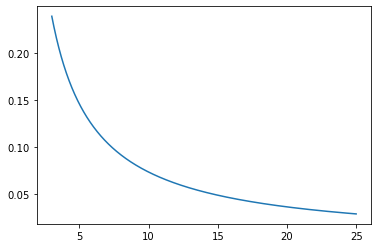

In [5]:
from scipy.stats import weibull_min
from scipy.special import gamma

h = 2
u_mean = rated

q = u_mean/(gamma(1+1/h))


x = np.linspace(cut_in, cut_out, num=1000)
pdf_wind =  weibull_min.pdf(c=h/q, x=x/q)
plt.plot(x, pdf_wind)

In [6]:
from scipy.integrate import simps

P_max = 0.5*ro*20612*rated**3*cp
P_max = 5600000
P_min = 0.5*ro*20612*cut_in**3*cp

P0 = 0

region_1 = (x < rated) & (x > cut_in) 
region_2 = (x < cut_out) & (x > rated) 

a = (P_max-P_min)/(rated-cut_in)
b = P_min
f_1 = a*x[region_1] + b

P1 = simps(
    x=x[region_1], 
    y=pdf_wind[region_1]*f_1)
#  

P2 = simps(x=x[region_2], y=pdf_wind[region_2])*P_max
#

P3 = 0

In [7]:
P0, P1, P2, P3

(0, 4096831.4123770907, 3759258.969216691, 0)

In [8]:
cut_in, rated, cut_out

(3, 10, 25)

In [10]:
(P1 + P2)*24*365

68819351742.76152